name: Marco Giunta

In [1]:
library("tidyverse")

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



# Exercise 1: expectation and variance for an empirically measured probability distribution
The first thing we need to do is to import the 3 data vectors; then we can use the definitions of exp. value and variance to compute our targets.

In [2]:
x <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)
prob.df <- data.frame(x, p1, p2)
prob.df

x,p1,p2
<dbl>,<dbl>,<dbl>
15.58,0.15,0.14
15.90,0.21,0.05
16.00,0.35,0.64
16.10,0.15,0.08
16.20,0.14,0.09


Now we can use the following formulae (which are *definitions* of these two quantities); given a discrete random variable $X$ with $k\leq +\infty$ possible values (each with its own probability $p_i$ of happening, i.e. that $X = x_i$) it holds that
\begin{equation}
\mathbb{E}(X) = \sum_{i=1}^k x_i p_i = p_1 x_1 + \dots + p_k x_k
\end{equation}
and that
\begin{equation}
\mathrm{Var}(X) = \mathbb{E}(X^2)-\left(\mathbb{E}(X)\right)^2 = \sum_{i=1}^k p_i x_i^2 - \left(\sum_{i=1}^k x_i p_i\right)^2 = \sum_{i=1}^k p_i x_i^2 - \mu^2
\end{equation}
These two quantities are readily computed using vectorized operation; in particular it suffices to compute the elementwise product of the `x` and `x^2` vectors with the `p1` and `p2` vectors.

In [3]:
E1 <- sum(x*p1) #this is a simple way to get our exp. value. We notice that E(X) is just the linear combination obtained by summing over the elementwise prod. of x and p1
#E1 <- (x %*% p1)[1] #an alternative approach is to use the dot product, since E(X) can actually be interpreted as <x,p1>
print(sprintf("Exp. value according to p1: %f", E1))

E2 <- sum(x*p2) #(x %*% p1)[1]
print(sprintf("Exp. value according to p2: %f", E2))

E12 <- sum(x^2*p1) - E1^2
E22 <- sum(x^2*p2) - E2^2

print(sprintf("Variance according to p1: %f",E12))
print(sprintf("Variance according to p2: %f",E22))

#we notice that the 2 distributions yield almost identical values for both E(X) and Var(X)

[1] "Exp. value according to p1: 15.959000"
[1] "Exp. value according to p2: 15.962200"
[1] "Variance according to p1: 0.033979"
[1] "Variance according to p2: 0.028167"


# Exercise 2: waiting time at the doctor's

The problem tells us that the waiting time in minutes (i.e. the time any given person needs to wait) is an exponentially distributed random variable with rate equal to $1/30$; this means that if we call our random variable $t$ then $t$ is sampled according to 
\begin{equation}
f(t) = \lambda \mathrm{e}^{\lambda t}, \quad \lambda > 0
\end{equation}
where in our case the rate is $\lambda = 1/30$.

## 2.1: Simulation of the waiting time of 50 people
Since the exponential distribution is already defined in R's packages we simply need to use the `rexp` function to simulate the waiting time of $n=50$ people; after this is done it's trivial to produce an histogram.

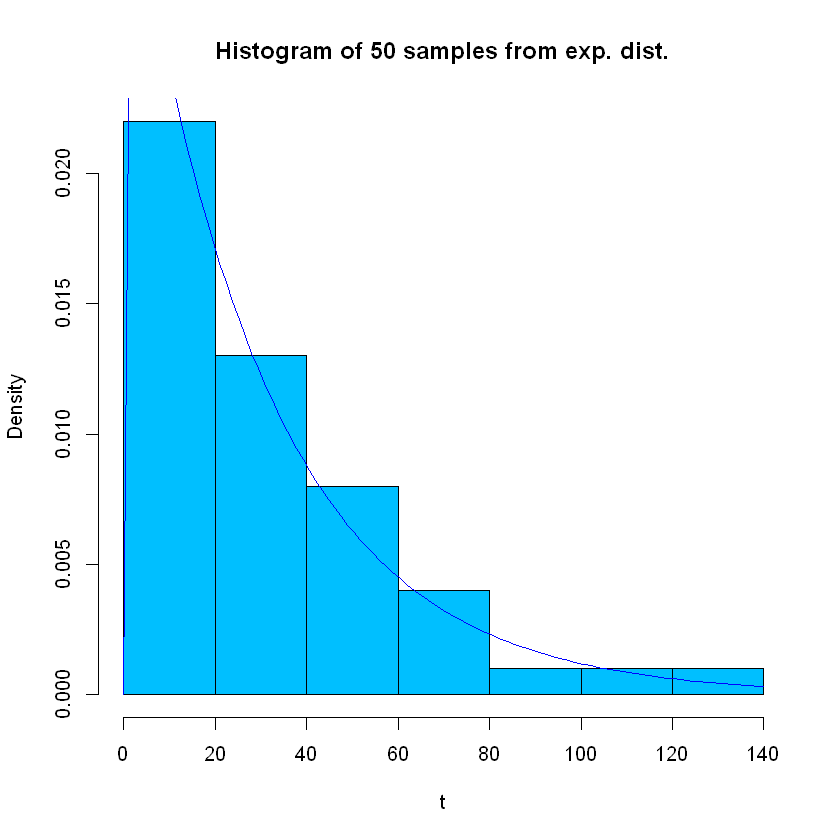

In [4]:
set.seed(1234) # to ensure result reproducibility
t <- rexp(50, rate = 1/30) # simulated set of people

# if the freq argument of hist is TRUE then we obtain the usual histogram of counts, but if we set it to FALSE we obtain an histogram of densities (i.e. normalized to area = 1).
# This is useful, because then we can stack the pdf and compare them (otherwise they don't have the same scale: the histogram has height > 70 whereas the pdf's height is < 1).
hist(t, freq = F, main = "Histogram of 50 samples from exp. dist.", col = "deepskyblue")
curve(dexp(x, rate = 1/30), add = T, col = "blue") # add = TRUE lets us stack the two plots

## 2.2: Probability of having $t\leq10$ minutes
By definition the CDF $F(\hat{t})$ computes the probability $P(t\leq\hat{t})$ that our random variable $t$ is bounded by some value $\hat{t}$; given that this function is already defined in R (`pexp`) it suffices to evaluate it for $\hat{t} = 10$ minutes.         
Note: it's irrelevant whether we write $t<10$ or $t\leq 10$, since $t=10$ occurs with probability 0 given that we're working with continuous distributions and the interval $[t,t]$ is always a measure zero set.

In [5]:
print(sprintf("The probability of waiting for less than 10 minutes is %f percent", pexp(10, rate = 1/30)*100))

[1] "The probability of waiting for less than 10 minutes is 28.346869 percent"


## 2.3: average vs expectation value
Let's say a given random variable $X$ is sampled from a known continuous probability distribution $f(x)$. Then by definition its *average*/*mean* and expectation value are respectively:
\begin{equation}
\langle X \rangle = \frac{1}{N} \sum_{i=1}^N x_i, \quad x_i \sim f(x) \ \ \forall i=1,\dots,N
\end{equation}
\begin{equation}
\mathbb{E}(X) = \int_{-\infty}^{+\infty} x f(x) \ \mathrm{d}x
\end{equation}
where we assumed that we did an experiment where $X$ was sampled $N$ times and found to be equal to $x_1,x_2,\dots,x_N$. These two values are connected: if $N\to +\infty$ they become equal (this result is quite intuitive if $X$ is discrete and we consider the frequentist definition of probability); this means that for example $\mathbb{E}(X)$ can be used as a theoretical prediction of what the result $\langle X \rangle$ of an experiment will be (provided $N$ is large enough), and more in general that the 2 of them must agree for $N\gg 1$.                       
Given $f(t) = \mathrm{Exp}(t)$ we compute 3 values:
1) the exact expectation value;
2) a numerical estimate of the expectation value;
3) the mean over the population we can sample with `rexp`.
**Exact expectation value**:
It suffices to use the definitions of $\mathbb{E}(X)$, $f(x)$ and the derivative under integral trick.
\begin{equation}
f(x) = \lambda \mathrm{e}^{-\lambda x}, \ \lambda>0, \ x \geq 0
\end{equation}
\begin{equation}
\mathbb{E}(X) = \int_0^{+\infty} x f(x) \ \mathrm{d} x = \lambda \int_0^{+\infty} x \mathrm{e}^{-\lambda x} \ \mathrm{d}x = \lambda \int_0^{+\infty} \left(-\frac{\partial}{\partial\lambda}\right) (\mathrm{e}^{-\lambda x}) \ \mathrm{d}x = -\lambda \frac{\mathrm{d}}{\mathrm{d}\lambda}\int_0^{+\infty} \mathrm{e}^{-\lambda x} \ \mathrm{d}x = -\lambda \frac{\mathrm{d}}{\mathrm{d}\lambda} \left[ \left(\frac{\mathrm{e}^{-\lambda x}}{\lambda}\right)\right]_0^{+\infty} = -\lambda \frac{\mathrm{d}}{\mathrm{d}\lambda} \left( \frac{1}{\lambda} \right) = -\lambda \frac{-1}{\lambda^2} = \frac{1}{\lambda}
\end{equation}

In [6]:
exp.exact <- 30
exp.numerical <- integrate(function(x){x*dexp(x, rate = 1/30)}, 0, Inf)
print("numerical estimate of expectation value:")
exp.numerical # almost identical to the theoretical value of 30.

[1] "numerical estimate of expectation value:"


30 with absolute error < 2.5e-05

In [7]:
exp.sample <- mean(t) # t is the set of waiting people we simulated earlier
print("experimental mean over a population of 50 people:")
exp.sample
print("percent difference wrt the theoretical result:")
(exp.exact - exp.sample)/exp.exact*100 # with N = 50 samples this is approximately 1%

[1] "experimental mean over a population of 50 people:"


[1] 29.67523

[1] "percent difference wrt the theoretical result:"


[1] 1.082566

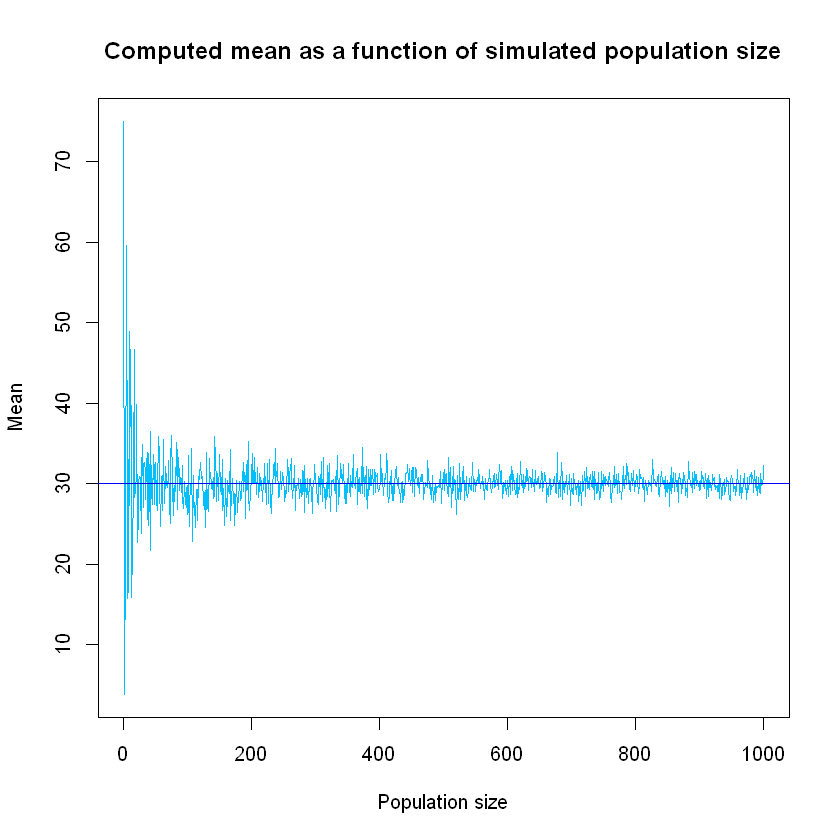

In [8]:
# How can we test whether the mean for N approaching infinity actually converges to the expectation value? We can easily define such a function and plot it

set.seed(1234)
exp.mean.over.n.samples <- Vectorize(function(n, lambda) mean(rexp(n, rate = lambda)))
# Convenience function to use with curve:
exp.mean.over.n.samples.1.30 <- function(x) exp.mean.over.n.samples(x, lambda = 1/30)                              

n.points <- 1000 # we need to evaluate the mean only over integer values, of course
#plot(rep(30, length.out = n.points))
curve(exp.mean.over.n.samples.1.30, from = 1, to = n.points, col = "deepskyblue", n = n.points, xlab = "Population size", ylab = "Mean", main = "Computed mean as a function of simulated population size")
abline(h = 30, col = "blue") # this lets us add a straigh line
                                     
# even though the result oscillates wildly it quickly settles around our expected result = 30

## 2.4: probability of having $t > 60$ minutes
Let $X$ be a random variable and let $x$ be one of the possible values of $X$. It's trivial that the 2 disjoint events $X\leq x$ and $X > x$ exhaust all of event space; this implies that the sum of their 2 probabilities is 1, i.e. that
\begin{equation}
P(X\leq x) + P(X > x) = 1 \implies P(X > x) = 1 - P(X\leq x)
\end{equation}
and therefore that 
\begin{equation}
P(X > x) = 1 - F(x)
\end{equation}
where $F(x)$ is the cdf of $X$. The above equation can also be derived using the properties of integrals (namely linearity wrt integration domain):
\begin{equation}
\int_{-\infty}^x f(x) \ \mathrm{d}x + \int_x^{+\infty} f(x) \ \mathrm{d}x = \int_{-\infty}^{+\infty} f(x) \ \mathrm{d}x = 1 \quad \forall x \in \mathbb{R}
\end{equation}
since $f$ is normalized. If we now remind ourselves that by definition of pdf $P(a\leq X\leq b) = \int_a^b f(x) \ \mathrm{d} x$ the above equation immediately yields
\begin{equation}
P(x < X \leq +\infty) = P(X > x) = 1 - \int_{-\infty}^x f(x) \ \mathrm{d}x = 1 - P(-\infty < X \leq x) = 1 - P(X < x)
\end{equation}
which means that $P(X > x) = 1 - F(x)$, exactly as derived above.                      
**Recap**: the answer to this question is $P(t > 60) = 1 - P(t \leq 60)$.

In [9]:
print("Percent probability of waiting more than 60 minutes:")
(1-pexp(60, rate = 1/30))*100
# The predefined pexp function actually has an option to compute the integral "above" x instead of "below" x as is customary in the CDF definition; an equivalent version of the above line is indeed the following
#pexp(60, rate = 1/30, lower.tail = FALSE)*100

[1] "Percent probability of waiting more than 60 minutes:"


[1] 13.53353

# Exercise 3: typos in a book
The description of the problem suggests to consider our random variable (number of mistakes in a book) to be a Poisson random variable with $\lambda = 1 \ \text{mistake} \ / \ 3 \ \ \text{pages}$ i.e. $\lambda = 1/3$; this is enough information to plot the pdf and cdf (via the `dpois` and `ppois` functions, respectively) and the probability of having $\geq 1$ errors in any given page (via `ppois` once again).

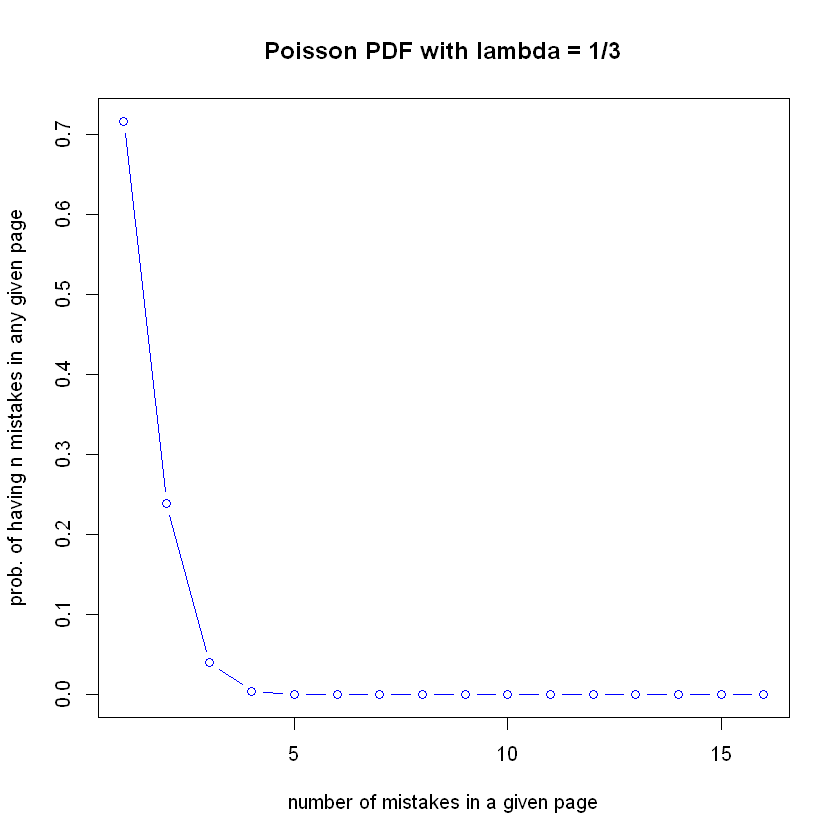

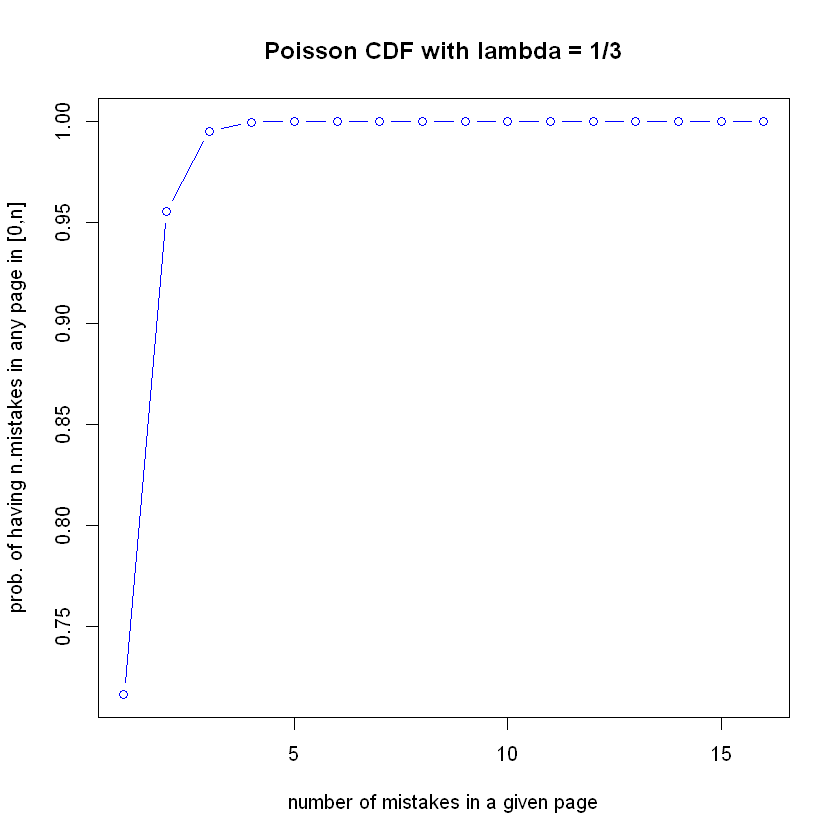

In [10]:
n <- 0:15 #since this is a discrete distribution the input of the following functions must be an integer vector; integers from 0 to 15 suffice to create a simple plot.
plot(dpois(n, lambda = 1/3), type = "b", col = "blue", main = "Poisson PDF with lambda = 1/3", xlab =  "number of mistakes in a given page", ylab = "prob. of having n mistakes in any given page")
plot(ppois(n, lambda = 1/3), type = "b", col = "blue", main = "Poisson CDF with lambda = 1/3", xlab =  "number of mistakes in a given page", ylab = "prob. of having n.mistakes in any page in [0,n]") #i.e. between 0 and n
#since we set lower.tail = T (default value)

To compute the probability of having at least 1 error in any given page we can proceed in at least two different but equivalent ways:
- we can sum the probabilities of having $n=1$, $n=2$, $n=3$, ... which is the discrete equivalent to the integral we perform to obtain the CDF of a continuous distribution.
- we can set this probability equal to 1 - the probability of having less than 1 error (which is simply the probability of having $n=0$) - cfr the discussion contained in the previous exercise.                      
Both of these can be performed with the `ppois` function (we only need to adjust the `lower.tail` argument).

In [11]:
# from the ppois documentation we notice that if lower.tail is set equal to TRUE we obtain the prob. that X <= x; if it's set to FALSE we obtain the prob. that X > x. 
# Due to this convention we need to consider the following: 
# - the prob. that X < 1 is equal to the prob. that X <= 0 (lower.tail = TRUE with x = 0)
# - the prob. that X >= 1 is equivalent to the prob. that X > 0 (lower.tail = FALSE with x = 0)
# This means we need to feed 0 (not 1) as input to ppois

print(sprintf("Prob. of having at least 1 mistake (direct computation): %f", ppois(0, lambda = 1/3, lower.tail = FALSE)))
print(sprintf("Prob. of having at least 1 mistake (1 - conj. prob.): %f", 1 - ppois(0, lambda = 1/3, lower.tail = TRUE)))
# the results agree as expected.

[1] "Prob. of having at least 1 mistake (direct computation): 0.283469"
[1] "Prob. of having at least 1 mistake (1 - conj. prob.): 0.283469"


# Exercise 4: playing with a deck of cards

Imagine we randomly draw one card from a deck of 52 cards; since only 4 cards are aces we have a probability $p=4/52$ of drawing an ace. It's clear that if we pick a single card then this is a Bernoulli process because only two outcomes are possible (ace --> success, not ace --> fail). If we repeat this process many times and consider the random variable $X$ "draws until first success" then it's clear that $X\sim\mathrm{Geom}(p)$, where $p$ is constant (always 4/52) if we draw with replacement (if we threw away extracted cards then the 52 at the denominator would decrease once per iteration, for example).                 
Once again we remind ourselves that by definition $P(X \leq x)$ can be computed as $F(x)$ where $F(x)$ is the cdf associated to the $\mathrm{Geom}(p)$ pdf, and that $P(X \geq x) = 1 - P(X < x)$; this means that this problem is trivially solved with the `pgeom` R function.

In [12]:
# important comment: now we're dealing with discrete pdf, which means that X = a number is no longer an event occurring with probability zero; this means that for instance P(X<10) and P(X<=10) are distinct!
# this means thath the formula we need to use is the following: P(X >= 10) = P(X > 9) = 1 - P(X <= 9)
print("percent probability that at least 10 draws are needed before we obtain one ace:")
100*(1 - pgeom(9, prob = 4/52))

[1] "percent probability that at least 10 draws are needed before we obtain one ace:"


[1] 44.91371

# Exercise 5: time to complete the exam
As the problem tells us if $t$ is the time in hours needed to complete the TOLC-I exam then $t$ is a random variable obeying the distribution

\begin{equation}
f(t) = \left\{ 
    \begin{array}
        \ c(t-1)(2-t) \quad 1 < t < 2 \\ 0 \quad \text{otherwise}
    \end{array}
\right.
\end{equation}

## 5.1: determination of the normalization constant $c$
In order for $f(t)$ to be an actual pdf it needs to be normalized, i.e. it must hold that
\begin{equation}
\int_{-\infty}^{+\infty} f(t) \ \mathrm{d} t = 1
\end{equation}
This integral is quite easy to evaluate exactly, since $f$ is equal to 0 for most of the time.
\begin{equation}
\int_{-\infty}^{+\infty} f(t) \ \mathrm{d} t = \int_{-\infty}^{1} f(t) \ \mathrm{d} t + \int_{1}^{2} f(t) \ \mathrm{d} t + \int_{2}^{+\infty} f(t) \ \mathrm{d} t =
\underbrace{\int_{-\infty}^{1} 0 \ \mathrm{d} t}_{= \ 0} + \int_{1}^{2}c(t-1)(2-t) \ \mathrm{d} t + \underbrace{\int_{2}^{+\infty} 0 \ \mathrm{d} t}_{= \ 0} = \int_{1}^{2}c(t-1)(2-t) \ \mathrm{d} t
\end{equation}
We obtain:
\begin{equation}
\int_{1}^{2}c(t-1)(2-t) \ \mathrm{d} t = c \left[-\frac{t^3}{3} + \frac{3t^2}{2} -2t \right]_1^2 = \dots = c\frac{1}{6}
\end{equation}
This equals 1 iff $c=6$, which is our exact result; we can confirm this is correct via numerical integration as follows.

In [13]:
f <- function(t) {ifelse((t > 1 & t < 2), (t-1)*(2-t), 0)}
integral.value <- integrate(f, 1, 2)$value
integral.error <- integrate(f, 1, 2)$abs.error
print(sprintf("The numerical integral of f/c between 1 and 2 is: %f with absolute error < %f",integral.value, integral.error))
print(sprintf("This means that numerically c is %f", 1/integral.value))
#print(integrate(f, 1, 2))

[1] "The numerical integral of f/c between 1 and 2 is: 0.166667 with absolute error < 0.000000"
[1] "This means that numerically c is 6.000000"


## 5.2: functions definitions and plots

To write the four functions for the `examtime` distribution we consider what follows.
- PDF: we already know that our random variable $t$ follows the distribution $f(t)$, therefore to define `dexamtime` it suffices to implement $f$.
- CDF: by definition the cdf is the integral of the pdf - which we already computed analytically; if we properly fix the integration bounds we once again only have to implement a simple function defined by cases (we can also do this numerically, which is a bit easier).
- quantile function: we can invert the cdf where it is strictly increasing; see the code cell for more details.
- random variable sampling function: since we have an exact formula for the inverse cdf we can easily sample from $f(t)$ by "recycling" a uniform distribution random number generator; see the code cell for more details.

In [14]:
#note: in each of these functions we will add the same arguments that can be found in, say, dnorm etc. (therefore we will need logical variables log, lower.tail and log.p)

dexamtime <- function(t, log = FALSE) {
    y <- ifelse((t > 1 & t < 2), 6*(t-1)*(2-t), 0) #we set c=6 because we know this to be the exact normalization constant.
    if (log) {return(log(y))}
    else {return(y)}
}

#dexamtime(1.5)

# if (...) is not vectorized in R, but ifelse is. In order to explain what is going on I first defined a pexatime function which is to be used with scalars only for clarity's sake; 
# after this is done I properly vectorize it by replacing if(...) with ifelse(...), which *is* vectorized.

pexamtime.scalar <- function(t, lower.tail = TRUE, log.p = FALSE) {
    #let's distinguish 3 cases when lower.tail equals its default TRUE value - i.e. when cdf(t) = \int_{-\infty}^t f(t') dt' .
    #1) if t<=1 f is zero inside the integration interval and so is its integral:
    if (t <= 1) {y <- 0}
    
    #2) if 1<t<2 then we only need to consider the integral of f between 1 and t (since f is zero for t <= 1), which (since c=6) is equal to the following function (as can be easily shown):
    if (t > 1 & t < 2) {y <- 6*(-t^3/3 + 3*t^2/2 - 2*t) + 5} #numerical alternative: see below    
    
    #3) if t >= 2 then we are considering the whole support of f, therefore our cdf equals the integral between +- infinity - but since f has been normalized this is trivially 1.
    if (t >= 2) {y <- 1}
    
    # now we consider that if lower.tail is FALSE then the integral is not from - infinity to t but from t to + infinity. This seems a bit problematic because it seems to imply we have to re-define by cases our cdf,
    # but things need not be this complicated; it suffices to consider that P(T > t) = 1 - P(T <= t) because the two events T <= t and T > t encompass every possible event (and therefore the sum of their probabilities must be 1).
    # This means we can avoid the computation of a different integral, because the result will be 1 - y (this can be formally proved with the property that integrals are linear wrt the integration interval).
    if (lower.tail == FALSE) {y <- (1 - y)}
    
    # finally we observe that if log.p is TRUE we need to return the logarithm of y instead of y itself.
    if (log.p) {y <- log(y)}
    
    return(y)
}

# to obtain a properly vectorized version of the above function we only need to replace if(condition) {y <- value} with y <- ifelse(condition, value). This will make the function harder to read, though, 
# since the fact that we need to consider 3 cases makes it so that we have to nest multiple calls to ifelse.

pexamtime <- function(t, lower.tail = TRUE, log.p = FALSE) {
    # notice that if the first two checks fail then it's automatically true that t is in ]1,2[ and hence there's no need to check it --> we can omit a third ifelse.
    y <- ifelse((t <= 1), 0, ifelse((t >= 2), 1, 6*(-t^3/3 + 3*t^2/2 - 2*t) + 5))
    
    if (lower.tail == FALSE) {y <- (1 - y)}
    
    # finally we observe that if log.p is TRUE we need to return the logarithm of y instead of y itself.
    if (log.p) {y <- log(y)}
    
    return(y)
}

# numerical alternative:
pexamtime.numerical <- function(t, lower.tail = TRUE, log.p = FALSE) {
    # this time we numerically compute our integral, which has nontrivial values only in ]1,2[
    f <- function(t) {ifelse((t > 1 & t < 2), 6*(t-1)*(2-t), 0)}
    #y <- ifelse((t <= 1), 0, ifelse((t >= 2), 1, integrate(f, 1, t)$value)) # if we use this line the pexamtime.numerical function won't work with vector inputs since integrate is NOT vectorized
    
    # What we need to do instead is to apply Vectorize to a function which returns integrate's output, then evaluate the resulting function on t inside the ifelse
    g <- Vectorize(function(z) integrate(f, 1, z)$value)
    y <- ifelse((t <= 1), 0, ifelse((t >= 2), 1, g(t)))
    if (lower.tail == FALSE) {y <- 1 - y}
    if (log.p) {y <- log(y)}
    return(y)    
}

### PDF & CDF Plots
Before defining the remaining two functions we plot the pdf and cdf.

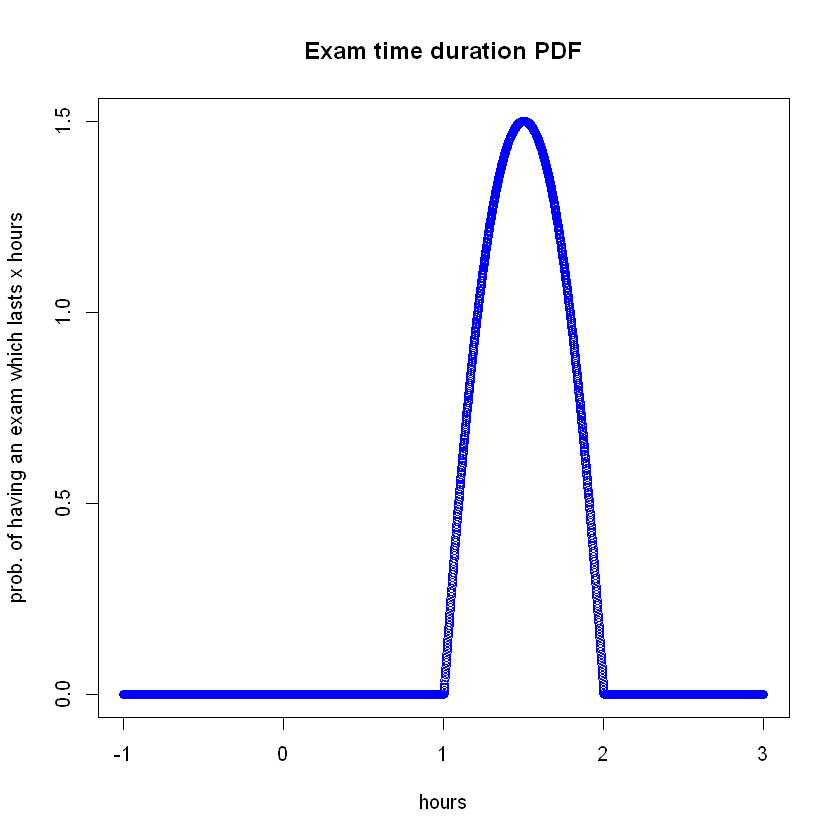

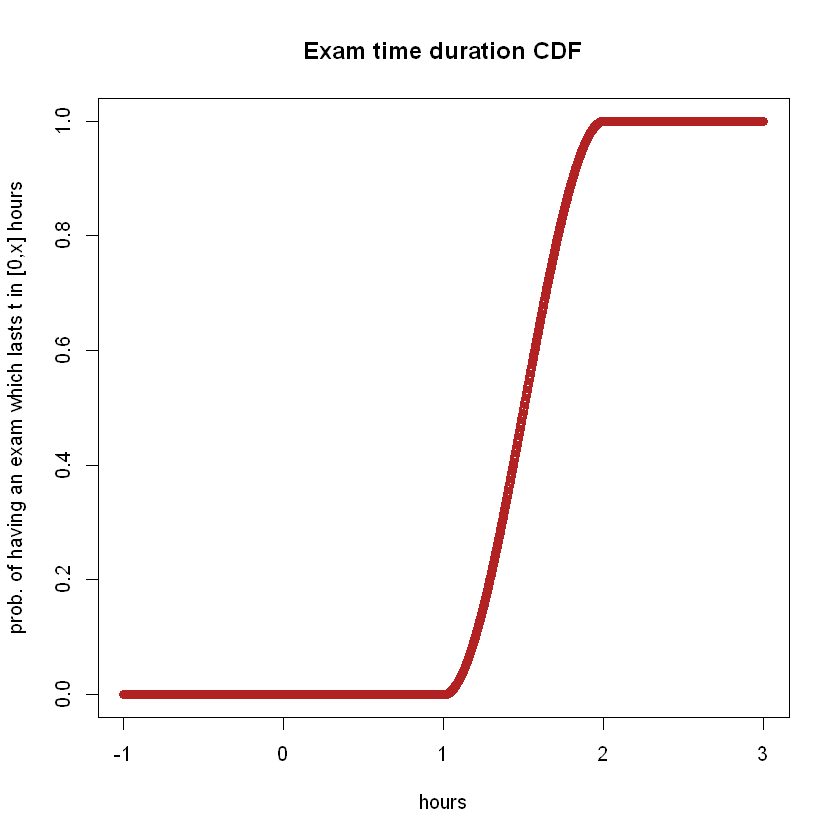

In [15]:
x <- seq(from = -1, to = 3, length.out = 3000) #alternatively I can specify by = 0.001 or some similar value
plot(x, dexamtime(x), type = "b", col = "blue", main = "Exam time duration PDF", xlab =  "hours", ylab = "prob. of having an exam which lasts x hours") #c(x[1],x[length(x)])
plot(x, pexamtime(x), type = "b", col = "firebrick", main = "Exam time duration CDF", xlab =  "hours", ylab = "prob. of having an exam which lasts t in [0,x] hours")

In [16]:
# before proceeding we check whether the 3 functions above are actually equivalent in the following way: we compute F(x) for a vector x with those 3 different functions and then compare the results with v1 == v2. 
# If every element of the resulting logical vector is true then it means the functions return the same result
N <- 3000
x <- seq(from = -1, to = 3, length.out = N)
#the first function is not vectorized and hence a for loop is unavoidable
a <- rep(0, N)
for (i in 1:N){
    a[i] <- pexamtime.scalar(x[i])
}
b <- pexamtime(x)
c <- pexamtime.numerical(x)

if (sum(a == b) == N) {print("The scalar and vectorized exact functions are equivalent")} #it's risky to use == with floats, but in this case the result is so close it works just fine
if (all.equal(b,c)) {print("The vectorized exact and numerical functions are equivalent")} # all.equal(b,c) is equivalent to (sum(b == c) == length(b))

[1] "The scalar and vectorized exact functions are equivalent"
[1] "The vectorized exact and numerical functions are equivalent"


Having plotted the CDF we are reminded that it's constant for $t\leq 1$ and $t\geq 2$, but we also notice a new fact: namely, the cdf is stricly monotonically increasing in $]1,2[$. These results mean that the cdf can be inverted in $]1,2[$, but not elsewhere since there the inverse would be undefined; indeed, there are infinite values of $t$ that make the cdf equal 0 or 1.

In [17]:
qexamtime.scalar <- function(y, lower.tail = TRUE, log.p = FALSE) {
    # by definition the quantile function Q(y) associated to the cdf F(x) returns the particular value of x such that F(x)=y; if F is a stricly monotonically increasing function then it holds that Q = F^-1.
    # Since by definition the cdf returns a probability it must always hold that F maps its domain to the interval [0,1], and hence the quantile's domanin must be [0,1], too, and because of this we define qexamtime in
    # such a way that it returns NA if the user tries to input a number not in [0,1].
    
    # Let's now say our user has inputted a number y in [0,1]; how do we compute Q(y)? If the cdf was a simpler function then we could compute its inverse analitically by solving the equation F(x) = y i.e.
    # by inverting F exactly, but this isn't practical in our case. We already know our F(x) is a 3rd degree polynomial, and hence F(x) = y can technically be solved exactly - but with a complex formula! Even if we use 
    # numerical root finding routines we have the issue that the three roots are real and therefore we'd have to choose one.
    # Because of this we turn towards a general method to numerically invert a monotonic function and proceed as follows.
    
    # Our task is to invert the function F(x) i.e. to solve the equation F(x) = y, which is equivalent to F(x)-y = 0. If we discretize our input values we can define a vector X, which represents every possible discrete input
    # to be fed to F; this lets us immediately compute the vector Y holding the images of our discretized domain (trivial if the implementation of F is vectorized). Let's now say that we want to find which x in X was used
    # to generate a certain y in Y; the x we're looking for is the one which solves F(x)-y=0, i.e. the component of F(X)-y which is closest to 0 (since by definition x's image is equal to y; we consider "closest" instead of "equal"
    # to account for numerical errors). If F is monotonic then the solution to this equation is actually unique, because in order to find multiple x's with the same images our function would either need to be constant or
    # to have a derivative with variable sign (neither of which is true for our cdf in its nontrivial interval).
    # Our numerical inversion algorithm is hence as follows: 
    # - if the user input is not in ]0,1[ we return NA (0 ad 1 are not included because any x outside ]1,2[ has 0 or 1 as image, hence F is not invertible there). Otherwise:
    # - we generate a grid X of interisting x values (i.e. between 1 and 2);
    # - we compute the argmin of |F(X)-y| for user input y (via which.min);
    # - we return the component of X of index equal to the above argmin.
    
    X <- seq(1, 2, length.out = 1e5) # finer grid divisions may be chosen
    x <- ifelse((y > 0 & y < 1), X[which.min(abs(pexamtime(X)-y))], NA)
    if (lower.tail == FALSE) x <- 1-x
    if (log.p) x <- log(x)
    return(x)
}

# The above function is not vectorized and instead returns a constant vector of the x associated to the last component of the input (I'm not sure why); to fix this we use the Vectorize function.
qexamtime <- Vectorize(qexamtime.scalar)
# an alternative is to use something like map_dbl(x, qexamtime.scalar)

# to check whether our quantile works as intended we generate a bunch of x values, compute their images with both the cdf and the quantile and check whether the result is close to x itself.
# this is equivalent to checking that the composition of the cdf and the quantile is the identity, which is what we expect given these functions are each other's inverse

x <- seq(1.1, 1.9, length.out = 1e3) # the only values we can consider are those in ]1,2[, otherwise the quantile is undefined and we obtain NA
all.equal(x, qexamtime(pexamtime(x))) # very small error on average! Even though the function is a bit slower to evaluate

# random variate sampler
rexamtime <- function(n) return(qexamtime(runif(n)))

[1] "Mean relative difference: 1.662359e-06"

Note that inverse transform sampling isn't the only way we have to define the `r` function (for example we could have used *rejection sampling*).

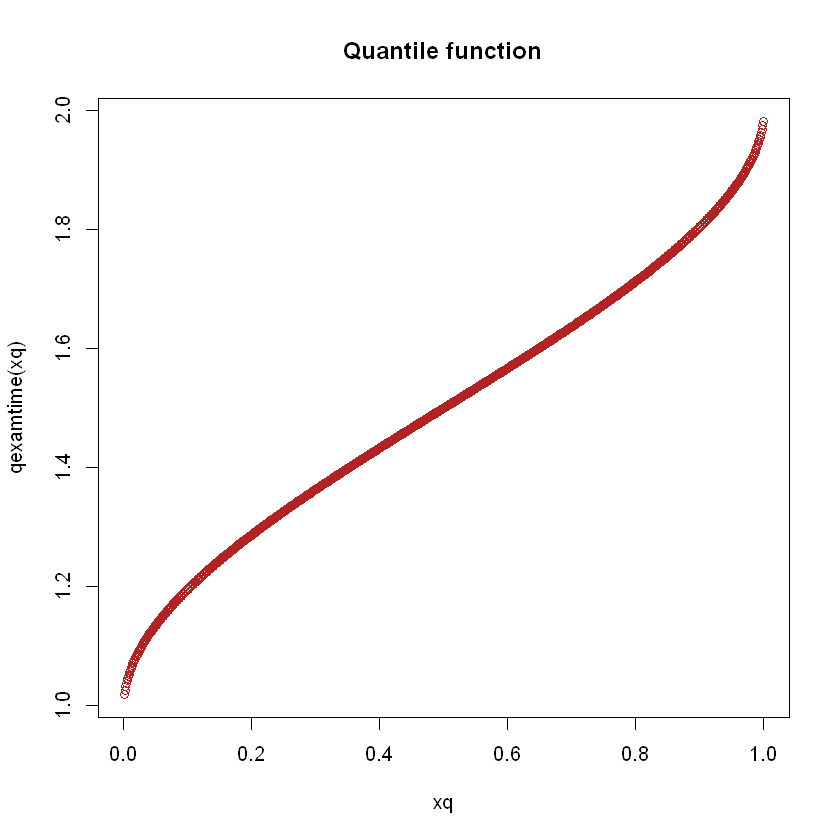

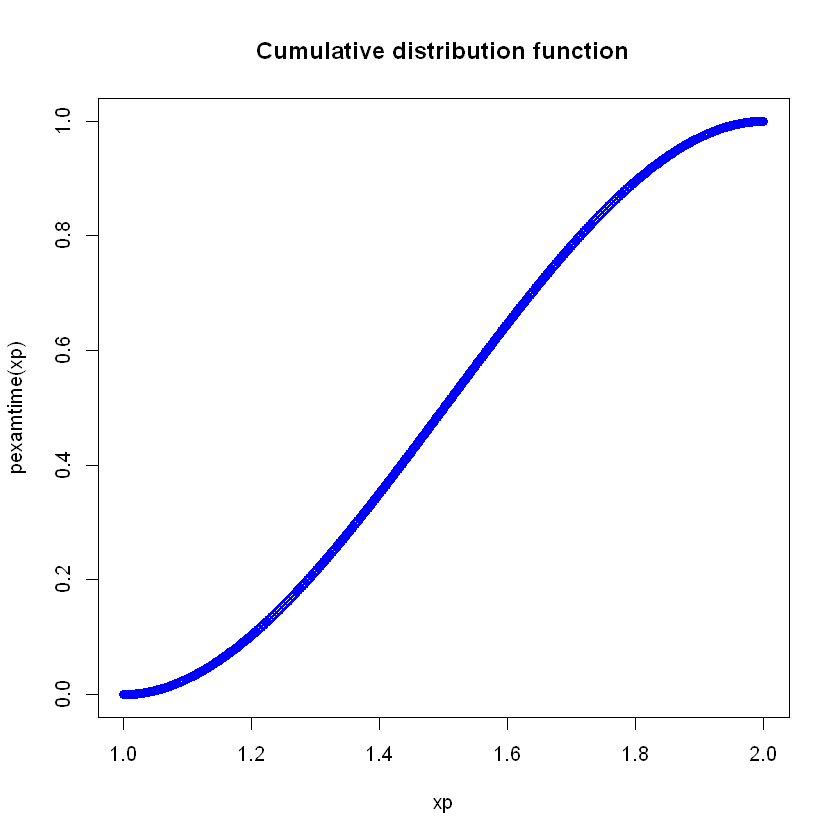

In [18]:
# a qualitative check we can do is to compare the shapes of the quantile and cumulative distribution functions; they should look the same but with the x and y axes flipped

xq <- seq(0, 1, length.out =  1000)
plot(xq, qexamtime(xq), col = "firebrick", main = "Quantile function") 

xp <- seq(1, 2, length.out = 1000) # we consider only the interval where the cdf is actually invertible because we need to compare apples to apples
plot(xp, pexamtime(xp), col = "blue", main = "Cumulative distribution function")

# as we can see these two plots are identical if we perform an orthogonal reflection wrt the 45 degree line, which means they are plots of the same function but with the axes flipped

## 5.3: computation of some probabilities
**Prob. the exam lasts more than 75 minutes**:
The probability that an exam will last more than $\hat{t}$ is given by $1 - F(\hat{t})$ since by definition $P(t \leq \hat{t}) = F(\hat{t})$; therefore it suffices to evaluate the CDF for $\hat{t}$ equal to 75 minutes.                              
**Prob. the exam lasts between 90 and 120 minutes**:
We can either integrate the PDF between these two extrema (90 and 120) or we can compute the difference of the CDF evaluated in 120 and 90 minutes, which also works due to linearity:
\begin{equation}
\int_{-\infty}^{120} f(t) \ \mathrm{d}t - \int_{-\infty}^{90} f(t) \ \mathrm{d}t = \left( \int_{90}^{120} f(t) \ \mathrm{d}t + \int_{-\infty}^{90} f(t) \ \mathrm{d}t \right) - \int_{-\infty}^{90} f(t) \ \mathrm{d}t 
= \int_{90}^{120} f(t) \ \mathrm{d}t
\end{equation}

In [19]:
# reminder: the pdf, cdf and so on are defined with the time in hours, not minutes!
print(sprintf("Probability that an exam lasts for more than 75 minutes: %f", pexamtime(75/60, lower.tail = FALSE)))

print(sprintf("Probability that an exam lasts between 90 and 120 minutes (direct integral): %f", integrate(dexamtime, lower = 90/60, upper = 120/60)$value))
print(sprintf("Probability that an exam lasts between 90 and 120 minutes (difference of CDF's): %f", (pexamtime(120/60)-pexamtime(90/60))))

[1] "Probability that an exam lasts for more than 75 minutes: 0.843750"
[1] "Probability that an exam lasts between 90 and 120 minutes (direct integral): 0.500000"
[1] "Probability that an exam lasts between 90 and 120 minutes (difference of CDF's): 0.500000"


# Exercise 6: lifetime of a tire

## 6.1.1: functions definition
To solve this exercise we can recycle the concepts explained in the previous one.                     
The problem tells us that the lifetime of a tire is $10^4\cdot X$ km, where $X$ is a random variable sampled from
\begin{equation}
f(x) = \left\{ 
    \begin{array}
        \ \frac{2}{x^2} \quad 1 < x < 2 \\ 0 \quad \text{otherwise}
    \end{array}
\right.
\end{equation}
To implement the pdf of this variable we can trivially reproduce $f(x)$ with a single `ifelse` statement, since it's a function defined by (2) cases; we proceed analogously to define the cdf (this integral can be computed exactly). The other 2 functions can be once again constructed by inverting the cdf and via inverse sampling transform.

In [20]:
# PDF
dtire <- function(x, log = FALSE) {
    y <- ifelse((x > 1 & x < 2), 2/x^2, 0)
    if (log) {y <- log(y)}
    return(y)
}

#dtire(1.5)

# CDF
# the indefinite integral of 2/x^2 is -2/x up to an arbitrary constant, and hence if we integrate this between 1 and t the result is -2/t + 2.
# When we integrate f for values smaller than 1 we get 0 since the integrand is identically zero, whereas due to normalization for values of the upper bound larger than 2 we get 1.
ptire <- function(x, lower.tail = TRUE, log.p = FALSE) {
    y <- ifelse((x < 1), 0, ifelse((x > 2), 1, (2 - 2/x)))
    if (lower.tail == FALSE) {y <- 1 - y}
    if (log.p) {y <- log(y)}
    return(y)
}

In [21]:
# Quantile
qtire <- function(y, lower.tail = TRUE, log.p = FALSE) {
    # This time everything is easier since the cdf is easily analitically inverted!
    # if y is not in ]0,1[ we return NA; otherwise we evaluate the inverse of y = 2-2/x i.e. x = 2/(2-y). Numbers 0 and 1 must be excluded since there are infinitely many values of x which will make y equal 0 or 1 
    # (any x outside ]1,2[ will)
    x <- ifelse(y < 1 & y > 0, 2/(2-y), NA)
    if (lower.tail == FALSE) x <- 1-x
    if (log.p) x <- log(x)
    return(x)
}

# how can we test whether what we wrote above is correct? If everything works then any number x between 0 and 1 must satisfy ptire(qtire(x)) == x because ptire and qtire must be inverse function - and hence their
# composition must be the identity. We quickly check this for some values between 0.1 and 0.9 as follows
v <- 0.1*(1:9)
near(ptire(qtire(v)),v) # dplyr::near is safer than == when working with floats

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [22]:
# Random variate

# We already computed the exact inverse of the cdf (it's the quantile function). To sample from the pdf via inverse transform sampling it suffices to sample from U([0,1]) and then feed the result into Q
rtire <- function(n) return(qtire(runif(n)))

## 6.1.2: plots

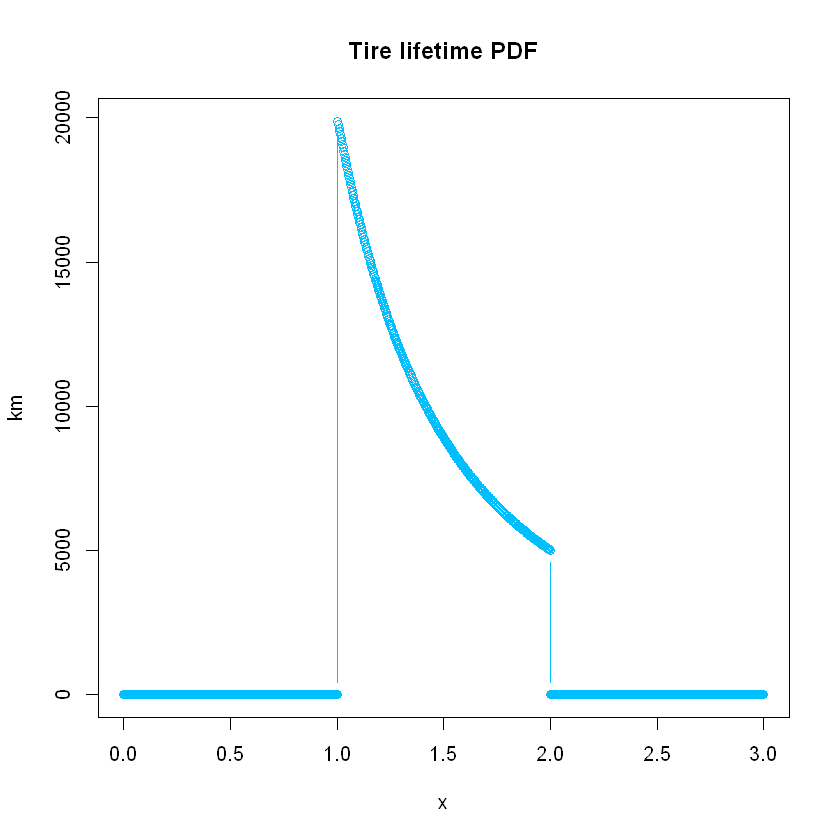

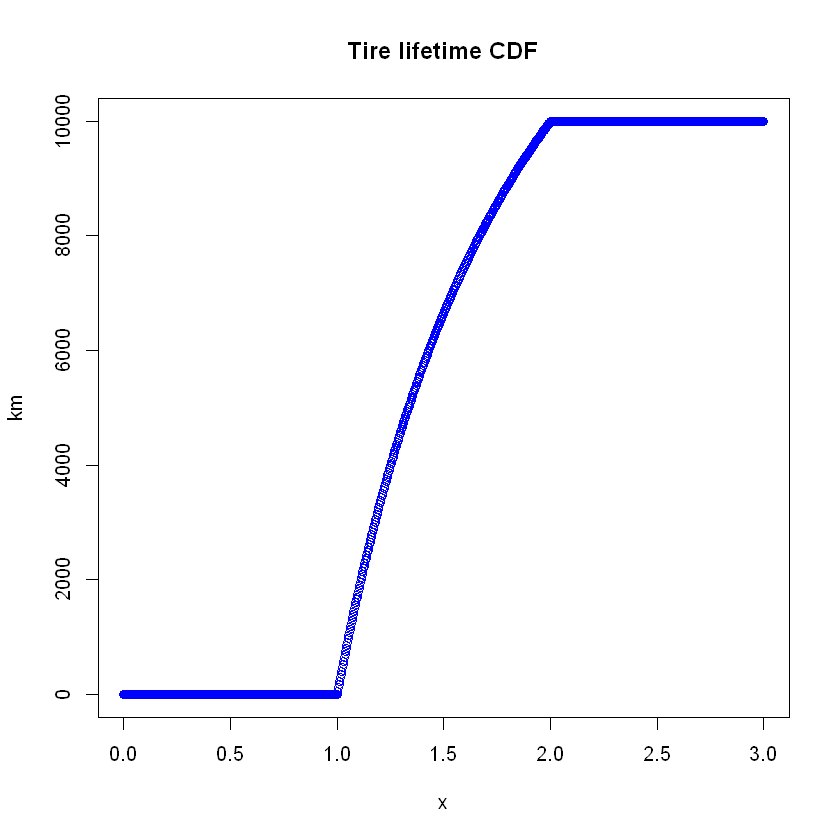

In [23]:
# PDF and CDF plot
curve(10^4*dtire(x), from = 0, to = 3, n = 1000, type = "b", col = "deepskyblue", main = "Tire lifetime PDF", ylab = "km")
curve(10^4*ptire(x), from = 0, to = 3, n = 1000, type = "b", col = "blue", main = "Tire lifetime CDF", ylab = "km")

## 6.2: probability that a tire lasts less than 15000 km
The probability that the lifetime of a tire is less than $15000 = 1.5\cdot 10^4$ km equals the probability that $X$ is less than 1.5, which is readily computed with the cdf.

In [24]:
print("Percent probability that a tire will last less than 15000 km:")
100*ptire(1.5)

[1] "Percent probability that a tire will last less than 15000 km:"


[1] 66.66667

## 6.3: mean, expectation value, variance
Once again we can use the usual formulae to compare the mean computed over a population sampled via `rtire` with the expectation value, and do analogous computations for the experimental/theoretical variance.              
**Exact expectation value**:
\begin{equation}
\mathbb{E}(X) = \int_{-\infty}^{+\infty} x f(x) \ \mathrm{d} x = \int_1^2 x \cdot \frac{2}{x^2} \ \mathrm{d} x = \int_1^2 \frac{2}{x} \ \mathrm{d}x = \left[2\ln x\right]_1^2 = 2\ln 2 - 2\underbrace{\ln 1}_{= \ 0} = 2\ln 2 = \ln 4 \approx 1.386
\end{equation}
**Exact variance**:
\begin{equation}
\mathbb{E}(X^2) = \int_{-\infty}^{+\infty} x^2 f(x) \ \mathrm{d} x = \int_1^2 x^2 \cdot \frac{2}{x^2} \ \mathrm{d} x =  \int_1^2 2 \ \mathrm{d}x = 2 \left[x\right]_1^2 = 2(2-1) = 2
\end{equation}

\begin{equation}
\mathrm{Var}(X) = \mathbb{E}(X^2) - (\mathbb{E}(X))^2 = 2 - (\ln 4)^2 \approx 0.078
\end{equation}

In [25]:
# We quickly check whether the above integrals have been computed correctly via numerical integration.
E.X.integral <- integrate(function(x){x*dtire(x)}, 1, 2)
E.X.numerical <- E.X.integral$value
print("percent difference between theoretical and numerical exp. values:")
100*abs(E.X.numerical - log(4))

E.X2.integral <- integrate(function(x){x^2*dtire(x)}, 1, 2)
Var.X.numerical <- E.X2.integral$value - E.X.numerical^2
print("percent difference between theoretical and numerical var. values:")
100*abs(Var.X.numerical - (2 - log(4)^2))

[1] "percent difference between theoretical and numerical exp. values:"


[1] 2.220446e-14

[1] "percent difference between theoretical and numerical var. values:"


[1] 6.661338e-14

In [26]:
E.X <- log(4)
Var.X <- 2 - (log(4))^2
print(sprintf("E[X] = %f",E.X))
print(sprintf("Var(X) = %f",Var.X))

# Now we sample a population of 3000 samples via the rtire function and compute the mean and var to compare them with the exact results
tire.lifespans <- rtire(3000)
average.lifespans <- mean(tire.lifespans)
var.lifespans <- var(tire.lifespans)
print(sprintf("Average lifespans of simulated tires: %f", average.lifespans))
print(sprintf("Variance of simulated tire lifespans: %f", var.lifespans))
print(sprintf("Percent difference between means: %f", 100*abs(average.lifespans - E.X)/E.X))
print(sprintf("Percent difference between variances: %f", 100*abs(var.lifespans - Var.X)/Var.X))
# pretty good agreement!

[1] "E[X] = 1.386294"
[1] "Var(X) = 0.078188"
[1] "Average lifespans of simulated tires: 1.390036"
[1] "Variance of simulated tire lifespans: 0.079023"
[1] "Percent difference between means: 0.269879"
[1] "Percent difference between variances: 1.067744"
